In [1]:
# Implement the Preparation class in Home-Credit-Prediction/homecredit/preparation.py

In [2]:

import os
import sys
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path_dir = (os.path.dirname(os.getcwd()))
sys.path.append(path_dir)

from homecredit.data import HomeCredit

In [4]:
data = HomeCredit().get_data()['train']
data.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:

class Preparation:
    
    def __init__(self):
        # Assign an attribute ".data" to all new instances of Preparation
        self.data = HomeCredit().get_data()['train'].copy() # good practice to be sure not to modify your `data` variable
        
    def get_catcols(self):
        
        cat_cols = [col for col in self.data.columns if self.data[col].dtypes == "O"]   
        return cat_cols
    
    def get_numcols(self):   
        num_cols = [col for col in self.data.columns if (self.data[col].dtypes != "O")]
        
        return num_cols

    def plot_catcols_whole(self):
        
        fig, axs = plt.subplots(len(self.get_catcols())//2, 2, figsize=(19,40)) # axs is a (1,2) nd-array
        for i, col in enumerate(self.get_catcols()[:8]):   
            sns.countplot(x = col, data = self.data, ax=axs[i, 0]); 

        for i, col in enumerate(self.get_catcols()[8:]):   
            sns.countplot(x = col, data = self.data, ax=axs[i, 1]); 

    def plot_catcols_single(self, col): # col : col name
        
        fig, ax=plt.subplots(1,2,figsize=(14,4))

        # First plot
        sns.countplot(x = col, data = self.data , ax=ax[0]); 
        #ax[0].set_title(str(col) +" Entries %");

        
        # Second plot
        t = pd.crosstab(self.data[col], "freq", normalize=True)
        t = t.assign(type = t.index, freq = 100 * t.freq) 
        sns.barplot(y = "type", x = "freq", data = t, ax=ax[1])
        ax[1].set_title("Comparing percentages for "+str(col))
        
    def plot_numcols_single(self, col, kde=True, bins=50): # col : col name
        
        plt.figure(figsize = (10, 4))
        sns.histplot(self.data[col], kde=kde, bins= bins);
        
    def plot_num_cat_cols(self, numcol, catcol, sample = 1000, plot_type = 1, hue = "TARGET", split=True): #target variable
        
        """ Parameters : 
        hue : "TARGET" or None"""
        
        # it takes too long with whole data
        # to simplify visualization, we use a sample
        df_sample = self.data.head(sample)
        
        if plot_type == 0:
            
            fig, ax=plt.subplots(2, 1, figsize=(19, 17))
            # First plot            
            df_sample.boxplot(by=catcol,column =[numcol], 
                              grid = False, ax=ax[0]); 
            ax[0].set_title(' ')
            ax[0].set_ylabel(str(numcol));
            # Second plot
            ax = sns.boxplot(y = catcol, x = numcol, orient = "h", data = df_sample, ax=ax[1]);
            
        else:
            
            fig, ax = plt.subplots(figsize=(19, 7))
            sns.violinplot(x= catcol, y= numcol, hue = hue, split = split,  data = df_sample)
            sns.swarmplot(x= catcol, y= numcol, data=df_sample, color="White") ;
        
        


In [6]:
ex = Preparation()

In [7]:
ex.__dict__.keys()

dict_keys(['data'])

In [8]:
ex.get_catcols()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [9]:
ex.get_numcols()

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

In [10]:
print( "catcols : ", len(ex.get_catcols()), " // numcols  :", len(ex.get_numcols()) )

catcols :  16  // numcols  : 106


# Data Visualization --- Categorical variables

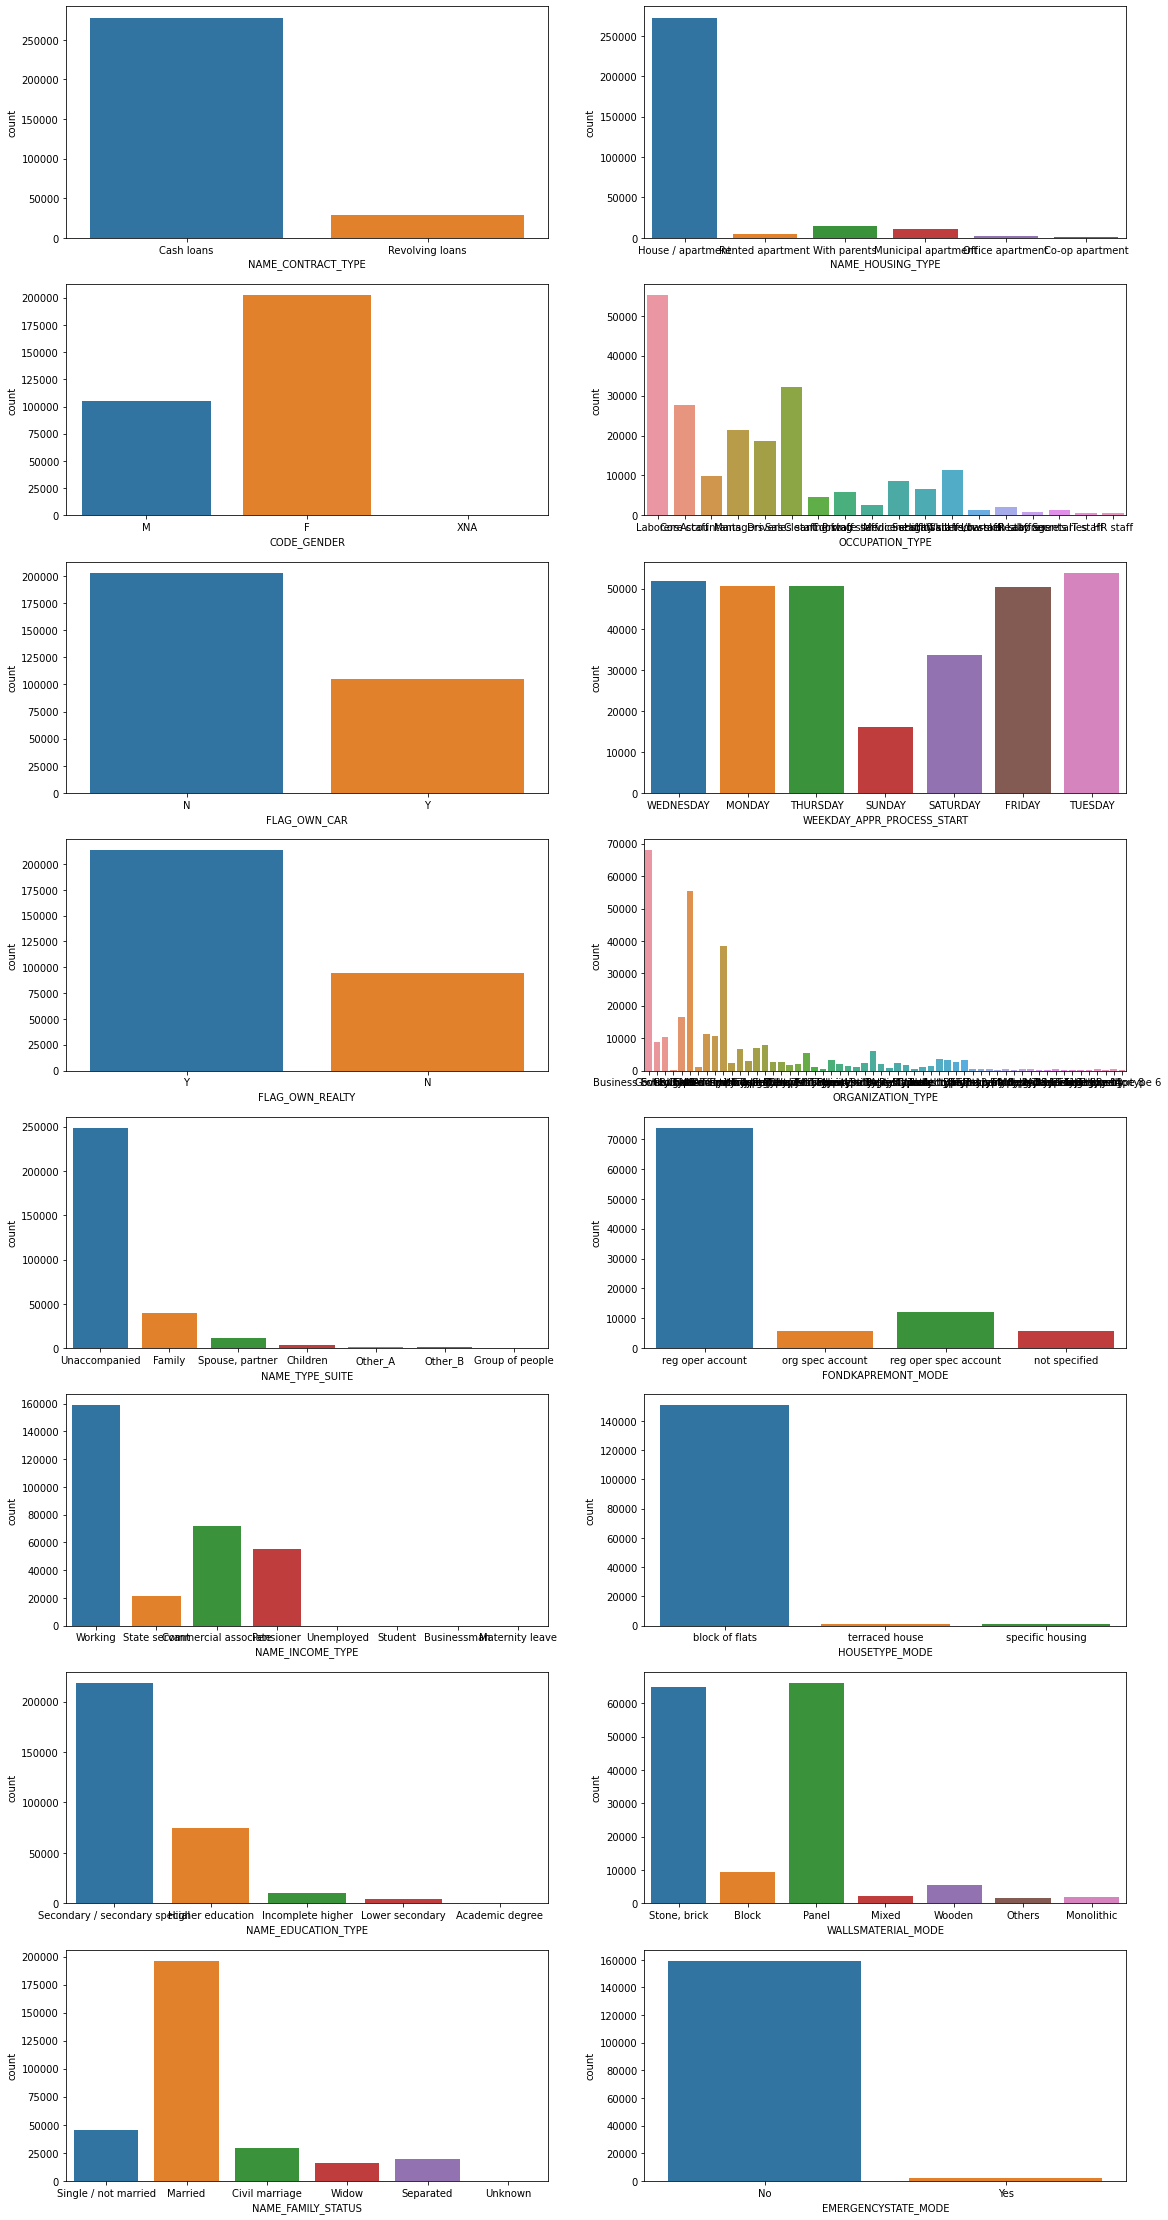

In [11]:
ex.plot_catcols_whole()

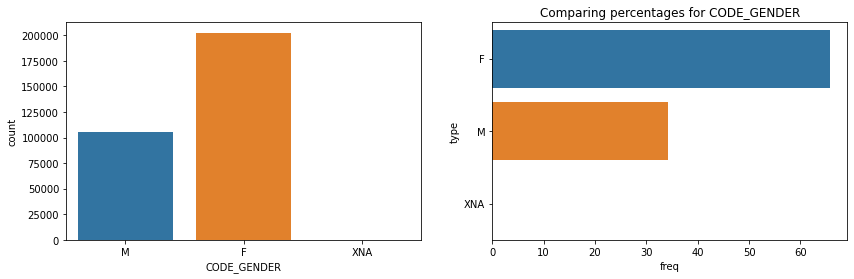

In [12]:
ex.plot_catcols_single(col = "CODE_GENDER")

# Data Visualization --- Numerical variables

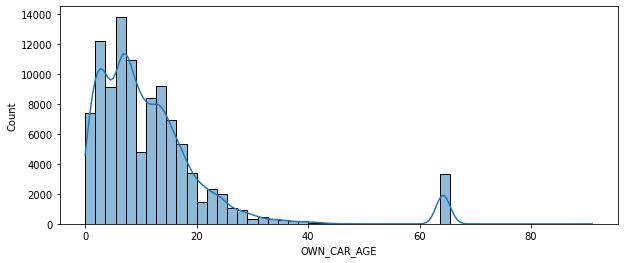

In [13]:
ex.plot_numcols_single(col="OWN_CAR_AGE", kde=True, bins=50)

# Data Visualization Categorical Vs. Numerical variables

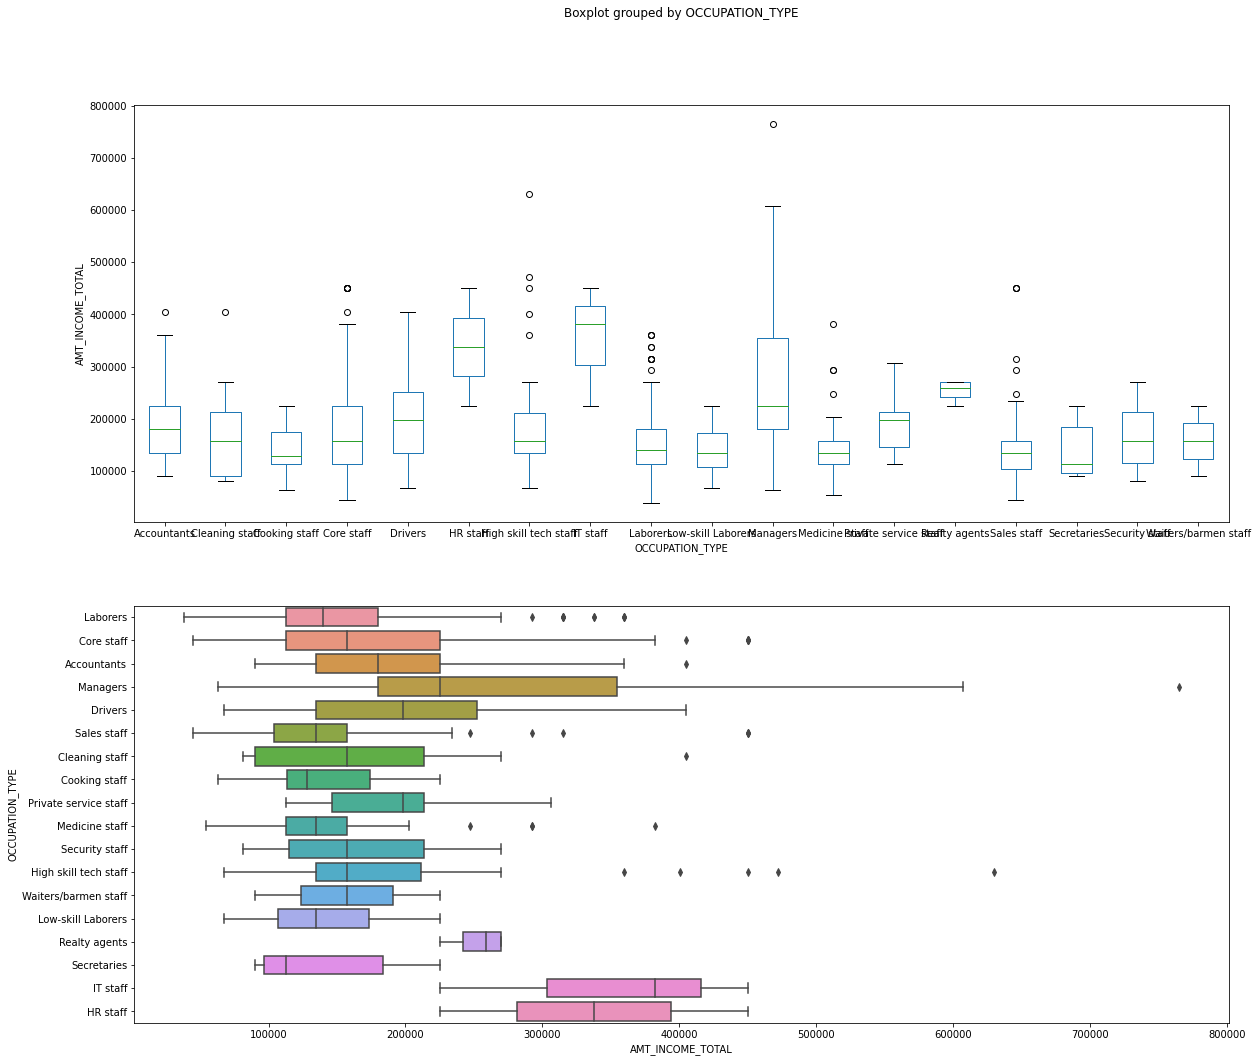

In [14]:
ex.plot_num_cat_cols(numcol= "AMT_INCOME_TOTAL", catcol="OCCUPATION_TYPE", sample = 1000, plot_type = 0)

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


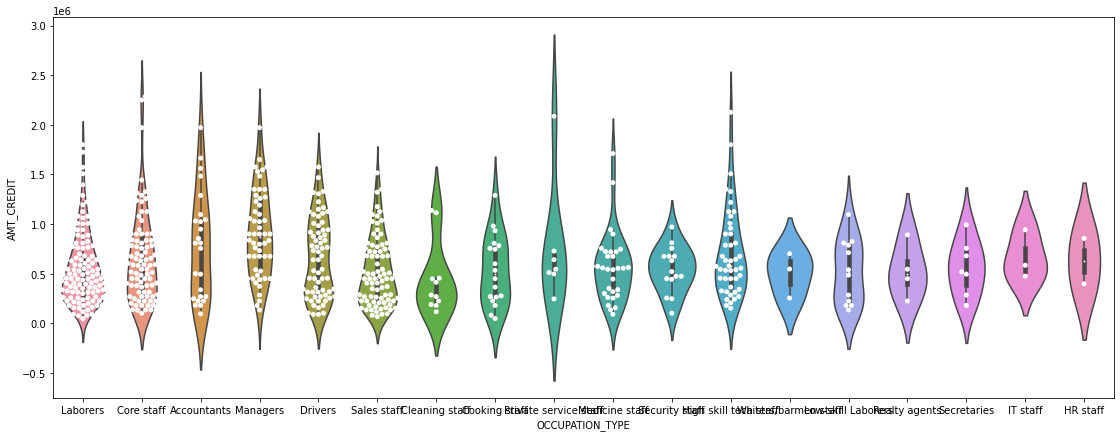

In [15]:
ex.plot_num_cat_cols(numcol= "AMT_CREDIT", catcol="OCCUPATION_TYPE", hue = None, split=False)

/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kenzaelhoussaini/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


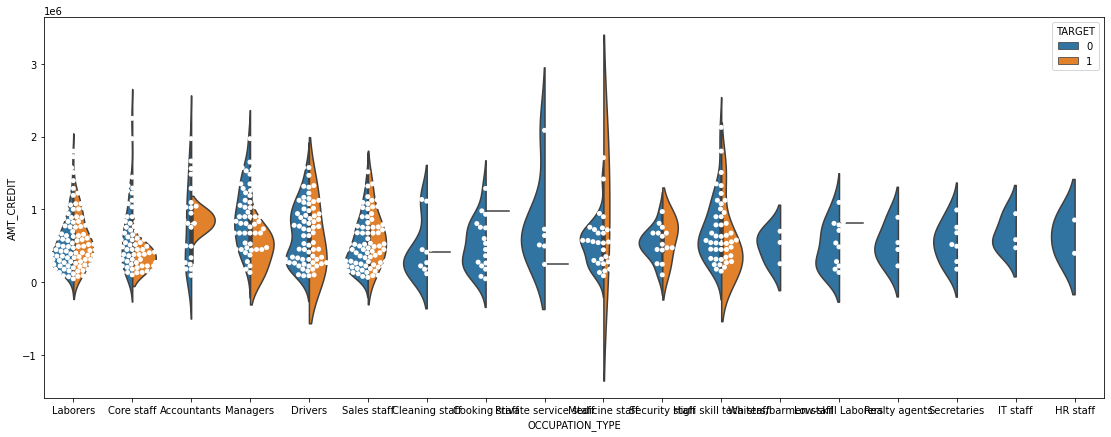

In [16]:
ex.plot_num_cat_cols(numcol= "AMT_CREDIT", catcol="OCCUPATION_TYPE")

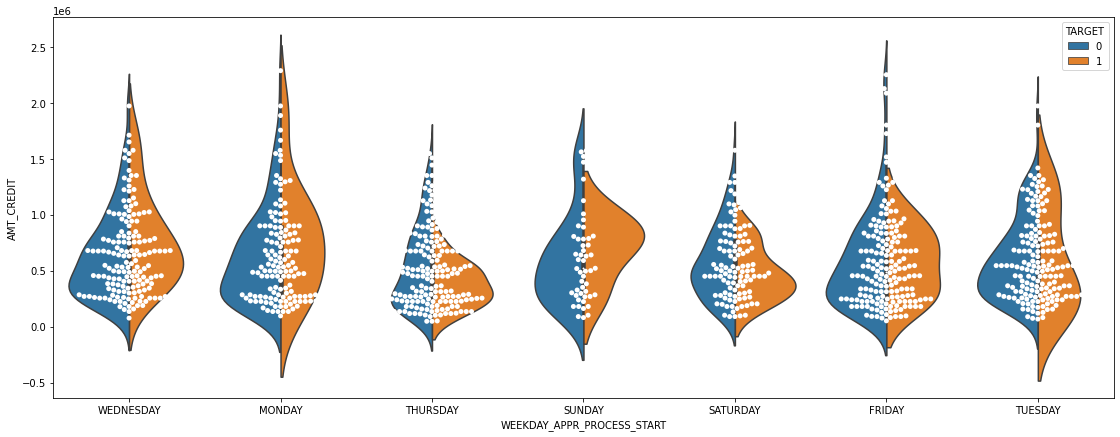

In [17]:
ex.plot_num_cat_cols(numcol= "AMT_CREDIT", catcol="WEEKDAY_APPR_PROCESS_START")